# 1. Introducción y motivación 

- Contenido del dataset son datos de distintas estaciones meteorológicas de Australia.  

- El objetivo es predecir si lloverá o no 
al día siguiente (variable RainTomorrow), en función datos meteorológicos del día 
actual. 

# 2. Análisis exploratorio inicial 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("dataset/weatherAUS.csv")

#### 2.1 Visualizar las primeras filas. 

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### 2.2 Realizar un resumen de 5 números.

**Cantidad de registros y columnas del dataset**

In [9]:
# 
df.shape

(145460, 23)

**Cantidad de valores únicos por feature**

In [73]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

#### 2.3 Identificar los tipos de datos.
Categórico, ordinal, etc. Responder para cada variable su tipo y si 
es informativa para un problema de clasificación (por ejemplo si se trata de un código, como 
una matrícula, o un nombre propio). 

Nota: Que un tipo de dato sea numérico no lo excluye de ser categórico.

**Tipos de Datos**

In [25]:
dtypes = df.dtypes 
dtypes
#Los datos object son variables categóricas a priori

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [79]:
num_columns = dtypes[dtypes == 'int64'].count() + dtypes[dtypes == 'float64'].count()
cat_columns = dtypes[dtypes == 'object'].count()
print(f"Cant. features numéricos: {num_columns} \nCant. features no numéricos: {cat_columns}")

Cant. features numéricos: 16 
Cant. features no numéricos: 7


**Métricas descriptivas de los features numéricos**

In [12]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Se observan estadísticos reelevantes, por ejemplo:

- Distintos valores de count. Esto sucede por la presencia de nulos. Evaporation y Sunshine son los features con más datos faltantes con casi un 50% de prescencia de nulos. Tambien hay varios faltanten en los datos que hacen referencia a la nubosidad (Cloud9am y Cloud3pm).
- Valores negativos para los campos de temperatura.

In [68]:
#algunos registros numericos
df[dtypes[dtypes == 'float64'].index.tolist()]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
145458,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


**Métricas descriptivas de los features no numéricos**

In [80]:
#algunos registros no numéricos
df[dtypes[dtypes == 'object'].index.tolist()]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No
145458,2017-06-24,Uluru,SE,SSE,N,No,No


Vemos que todas las columnas aportan información útil para el entrenamiento de un modelo. No se detecta la prescencia de códigos o índices instrascendentes en el dataset. Por ende todas pueden funcionar como variables de entrada a excepción de la variable a utilizar como target.

#### 2.4 Identificar las variables de entrada y de salida del problema.

**Variable de entrada del problema**

Mencionado previamente

**Variable de salida del problema**

In [66]:
df[dtypes[dtypes == 'object'].index.tolist()].nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

Vemos que la fecha es el feature no numérico con mas valores, seguido de location. Por otro lado, rainToday tiene dos valores posibles al igual que **RainTomorrow** (feature a utilizar como target).

#### 2.4 Variables de entrada:

##### 2.4.1 Numéricas 

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

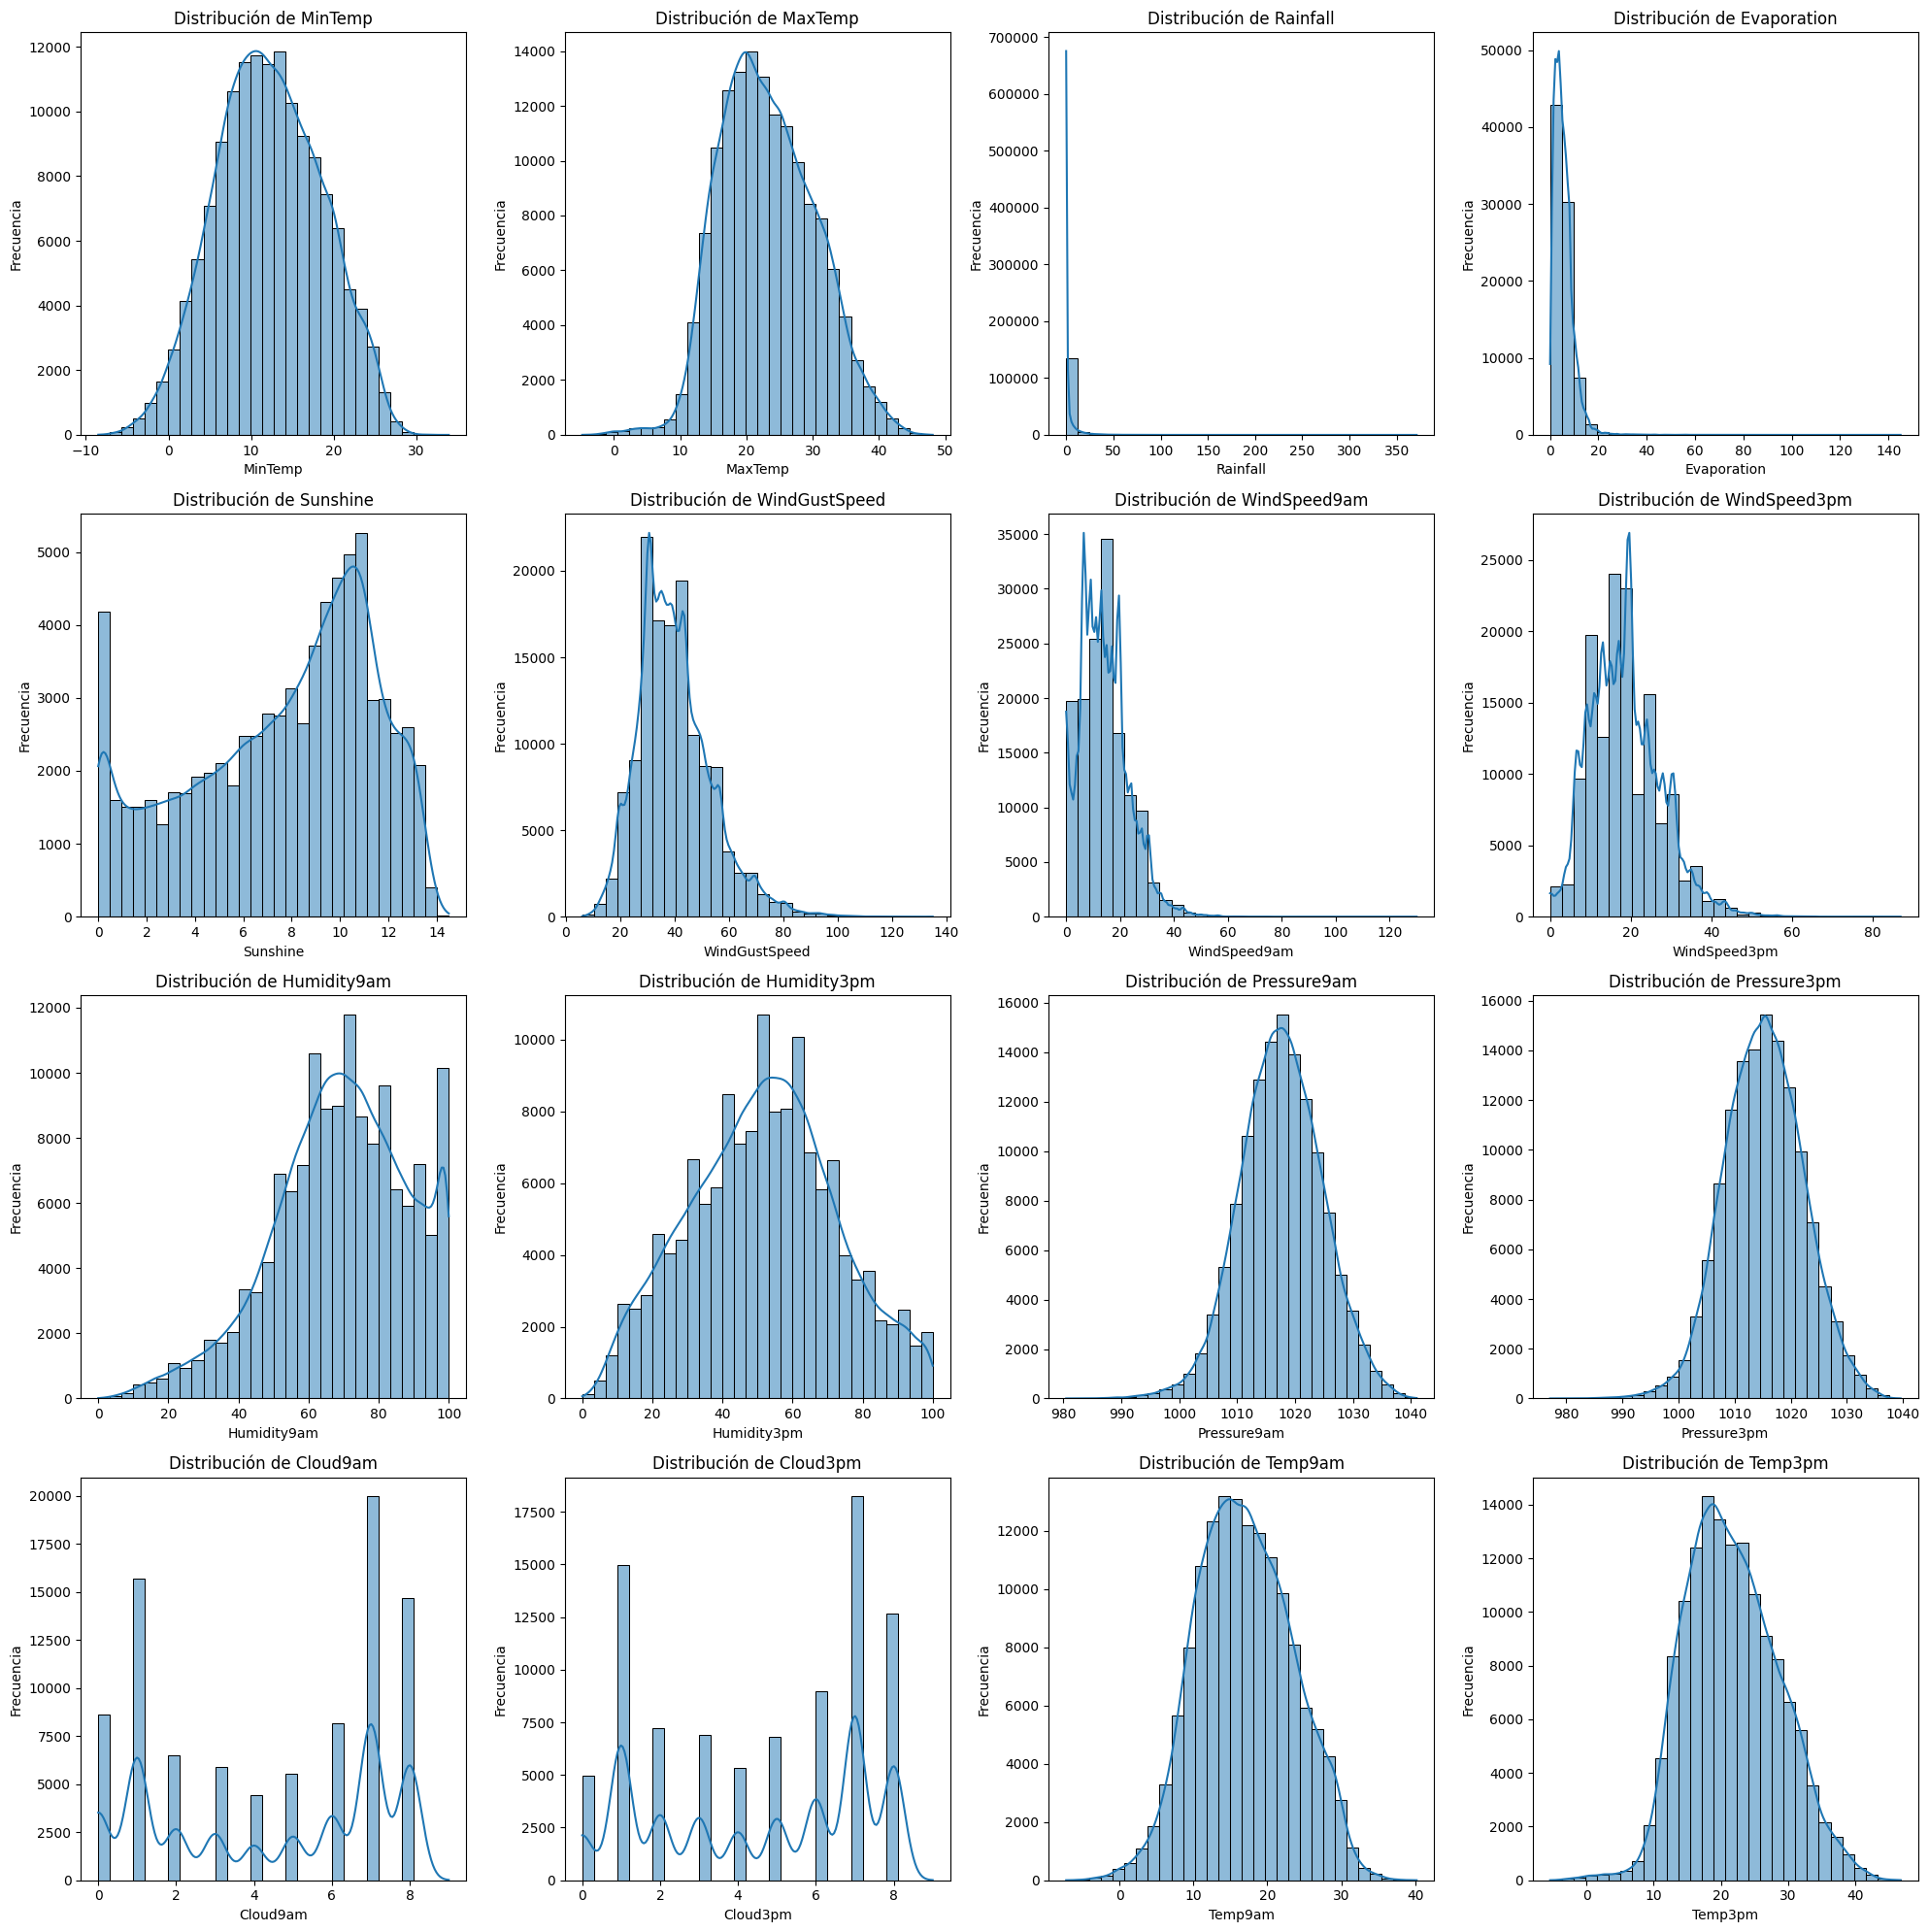

In [84]:
numeric_columns = df[dtypes[dtypes == 'float64'].index.tolist()]
num_cols = len(numeric_columns.columns)

nrows, ncols = 4, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))

for i, col in enumerate(numeric_columns.columns):
    row = i // ncols
    col_idx = i % ncols
    sns.histplot(df[col], kde=True, bins=30, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribución de {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frecuencia')

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

De las distribuciones se pueden obtener varias definiciones, por ejemplo:

- Distribución normal: MinTemp, MaxTemp, WindGustSpeed, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm
- Distribución sesgada negativamente: Rainfall (con outliers muy atípicos), Evaporation, WindSpeed9am, WindSpeed3pm
- Distribución sesgada positivamente: Evaporation (con muchos nulos), Humidity9am
- Distribución discreta: Cloud9am, Cloud3pm

Identificamos dos variables categóricas con tipo de dato numérico.

##### 2.4.2 Categóricas y variable de salida.

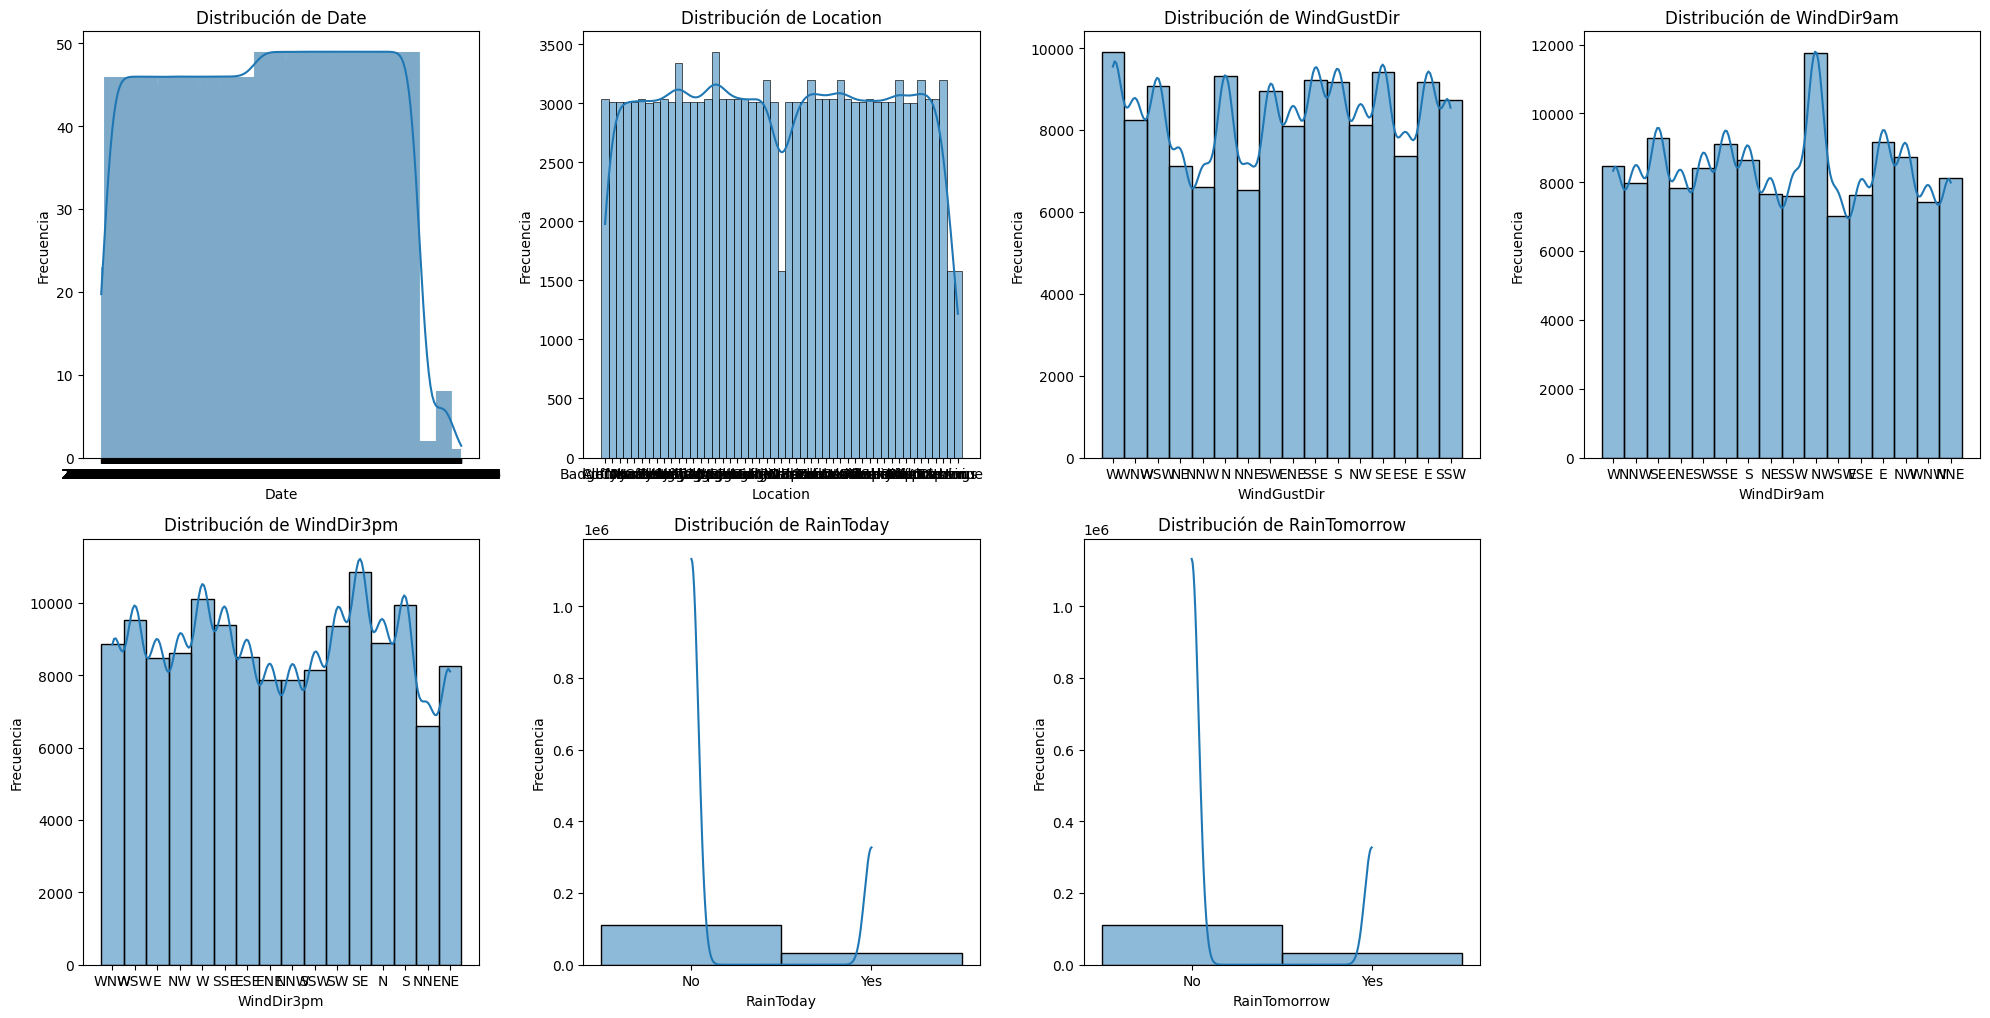

In [85]:
numeric_columns = df[dtypes[dtypes == 'object'].index.tolist()]
num_cols = len(numeric_columns.columns)

nrows, ncols = 4, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))

for i, col in enumerate(numeric_columns.columns):
    row = i // ncols
    col_idx = i % ncols
    sns.histplot(df[col], kde=True, bins=30, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribución de {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frecuencia')

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [88]:
df["Location"].unique() # ya que no se visualizan los labels en el grafico

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [90]:
df["Date"].unique() # ya que no se visualizan los labels en el grafico

array(['2008-12-01', '2008-12-02', '2008-12-03', ..., '2008-01-29',
       '2008-01-30', '2008-01-31'], dtype=object)

Viendo las distribuciones podemos mencionar algunos consideraciones, por ejemlo:

- El target de RainTomorrow (**variable de salida**) y el predictor RainToday están desbalanceados con mayor cantidad de datos con categoría "No".
- Date es un campo con cardinalidad con distribucion simil a una uniforme. Los valores categoricos cumplen una misma separacion temporal (un dia) lo que permite una codificacion simple como puede ser la siguiente conversion: 2008-12-02 --> 02122008. Sin embargo esto puede traer problemas en el cambio de año ya que no se respetaria un aumento unitario. Se puede hacer una codificacion a entero.